## **Machine Learning Final Project DUE: Friday May 7th 11:59pm**

**Note: Please read all the instructions carefully before starting the project.**

For your final project you will build an ML model to analyze a dataset of your choice. You are welcome to keep working on the data in your EDA project if your data is large enough (at least 1000 rows for simple models and at least 10,000 for more complex models) or you can choose from the datasets/project suggestions below.

In this project make sure that you:
- Have a large enough dataset
- Split your data in training and testing
- Explore your data to inform which type of model to choose (no need if you are using your EDA dataset)
- Try different models on your training dataset - then select the most promising model
- Use cross validation to fine tune the model’s parameters such as alpha in lasso
- Simplify your model using regularization, prunnning, drop-out, etc. to avoid overfitting
- Communicate your model’s performance and make sure you compare it to a benchmark when appropriate
- Plot interesting graphs and results
- Write and publish your article to medium
- Commit your code to your GitHub

Please ensure you handle all the preprocessing before the modeling.

Suggestions for project:
You can take a look at the resources given below for choosing a dataset for your project. 

- Traffic sign detection - https://benchmark.ini.rub.de/gtsdb_dataset.html
- Cat and dog classifier - https://www.kaggle.com/c/dogs-vs-cats/data
- Other datasets from Kaggle - https://www.kaggle.com/data/41592

## **Grading Criteria**

- Show clear exploration of the data to justify model choice
- Train mutliple models and clearly articulate why you chose your final model
- Show your performance on test dataset
- Clear and concise write-up with clear well-documented figures
- Commit your code to GitHub

## **Submission Details**

This is an individual assignment. You may not work in groups. The assignment is due on Friday (05/07/2021)
- To submit your assignment, download your notebook and the dataset, zip the dataset and notebook, and submit the zipped file on blackboard.
- Make sure the notebook is named in the format - Final_LastName_FirstName. If you are submitting a zipped file, please name the file as well in the same format.
- Please include the link to access your blog and your github repo in your notebook.
- Also include the link to your notebook, github repo and the blog in the submission on blackboard. Please ensure the TAs have the required access to your notebooks and the github repo.

**Note - If the dataset is too large to be zipped and submitted on blackboard, only submit your notebook, add your dataset to your google drive and share a link to the file in your notebook.**

# Heart Disease Project
Heart disease is the leading cause of death in the United States and refers to several types of heart conditions ranging from coronary heart disease, hypertension, and stroke. This project analyzes data from a heart disease dataset to find useful insights through powerful machine learning models. The dataset consists of 11 features and a target variable which predicts if the patient is suffering from heart disease risk of if the patient is healthy. The notebook also explores and investigates correlations between the data through different forms of visualizations, graphs, and results.

In [73]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report,
    recall_score,
    precision_score,
    accuracy_score
)
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression


In [72]:
# Read the data set
data = pd.read_csv('heartdisease.csv')

# Exploratory Data Analysis

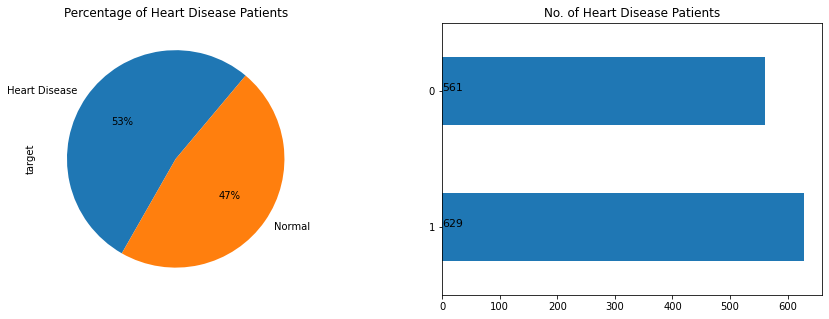

In [24]:
fig,(ax1, ax2) = plt.subplots(nrows=1, ncols=2,figsize=(15,5))

ax1 = data['target'].value_counts().plot.pie(x="Heart Disease",y ="No.of Patients", 
                   autopct = "%1.0f%%",labels=["Heart Disease","Normal"], startangle = 50,ax=ax1);

ax1.set(title = "Percentage of Heart Disease Patients")

ax2 = data["target"].value_counts().plot(kind="barh",ax =ax2)

for i,j in enumerate(data["target"].value_counts().values):
    ax2.text(1,i,j,fontsize=11)

ax2.set(title = "No. of Heart Disease Patients")

plt.show()

This visualization analyzes the distribution of the target variable. The graphs show that the data is fairly balanced, with around 53% of the data being at risk for heart disease and the other 43% healthy.

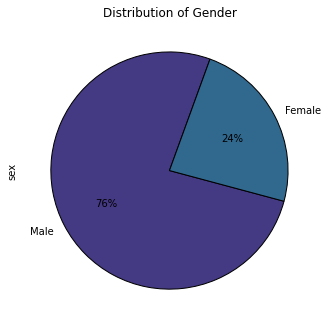

In [74]:
plt.figure(figsize=(18,12))
plt.subplot(221)
data['sex'].value_counts().plot.pie(autopct = '%1.0f%%',colors = sns.color_palette('viridis',5),startangle = 70,labels=['Male','Female'],
wedgeprops={'linewidth':1,'edgecolor':'k'})
plt.title("Distribution of Gender")

plt.show()


This visualization analyzes gender distribution among patients, with males being the clear majority.

Text(0.5, 1.0, 'Age Distribution of Normal Patients')

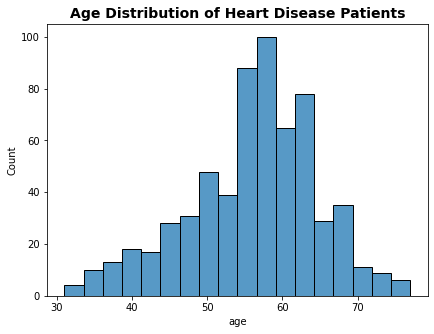

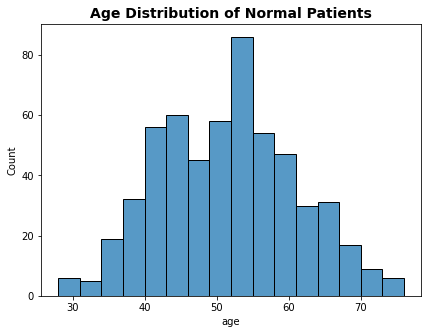

In [44]:
# heart disease patient age distribution

fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.histplot(attr_1['age'])
plt.title('Age Distribution of Heart Disease Patients', fontsize=14, weight='bold')

# normal patient age distribution

attr_1=data[data['target']==1]
attr_0=data[data['target']==0]
fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.histplot(attr_0['age'])
plt.title('Age Distribution of Normal Patients', fontsize=14, weight='bold')


This visualization analyzes the ages of the patients in the dataset. The plots show the average age of patients affected by heart disease is around 55 years of age.

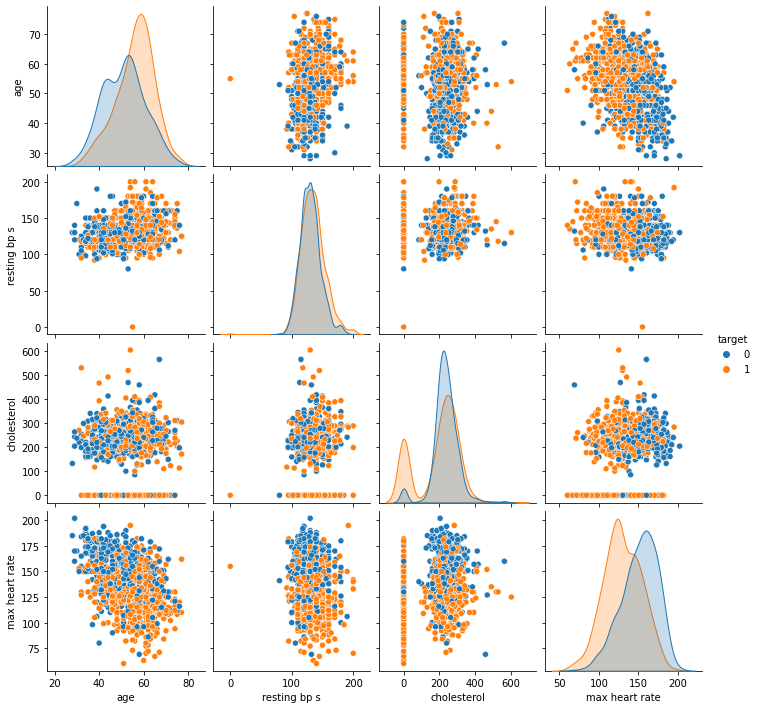

In [49]:
sns.pairplot(data, hue = 'target', vars = ['age', 'resting bp s', 'cholesterol', 'max heart rate'])

These plots clearly show that increasing age is the most significant factor in increasing the risk of heart disease in patients.

Chest Pain Types:
1.   typical angina
2.   atypical angina
3.   non-aninal pain
4.   asymptomatic



In [55]:
plot_criteria = ['chest pain type', 'target']
fig = sns.light_palette('red', as_cmap=True)
(round(pd.crosstab(data[plot_criteria[0]], data[plot_criteria[1]], normalize='columns')* 100,1)).style.background_gradient(cmap = fig)

target,0,1
chest pain type,,
1,7.300000,4.000000
2,33.000000,4.900000
3,34.400000,14.300000
4,25.300000,76.800000


This figure analyzes the chest pain types among the patients in the data set. The plot shows that 76% of the chest pain type among patients at risk of heart disease is asymptomatic, which can be cause for alarm.

# Models

In [91]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

# print(data.shape)
# print(X)
# print(y)

# partition data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
                                                    X,
                                                    y,
                                                    test_size=0.3,
                                                    stratify=y,
                                                    random_state=42
                                                    )
# compute baseline classification accuracy
dummy_classifier = DummyClassifier(strategy='most_frequent')
dummy_classifier.fit(X_train,y_train)
baseline_acc = dummy_classifier.score(X_test,y_test)


#verifying answer:
print("Baseline Accuracy = ", baseline_acc)

Baseline Accuracy =  0.5294117647058824


In [75]:
# Generic Bagging model
model_bagging = BaggingClassifier(random_state = 42)
model_bagging.fit(X_train, y_train)
pred_bagging = model_bagging.predict(X_test)
acc_bagging = accuracy_score(y_test, pred_bagging)

print('Accuracy:', acc_bagging)

Accuracy: 0.8907563025210085


In [76]:
# Random Forest model

model_rf_oob = RandomForestClassifier(n_estimators=500, max_features=7, oob_score=True, random_state=42).fit(X_train, y_train)
oob_score = round(model_rf_oob.oob_score_,4)
acc_oob = round(accuracy_score(y_test, model_rf_oob.predict(X_test)),4)
diff_oob = round(abs(oob_score - acc_oob),4)

print('Testing Accuracy:', acc_oob)

Testing Accuracy: 0.8992


In [77]:
# Top 3 features for RandomForest

print('OOB Score:', oob_score)
print('Testing Accuracy:', acc_oob)
print('Acc. Difference:', diff_oob)

OOB Score: 0.9136
Testing Accuracy: 0.8992
Acc. Difference: 0.0144


In [78]:
# AdaBoost Classification

base_est = DecisionTreeClassifier (max_depth =4)
ada_boost1 = AdaBoostClassifier(base_est, n_estimators=500, random_state=42, learning_rate=.05)
ada_boost1.fit(X_train, y_train)

print("Accuracy:", accuracy_score(y_test, ada_boost1.predict(X_test)))

Accuracy: 0.896358543417367


In [90]:
# Top 3 features for AdaBoost

feature_importances = ada_boost1.feature_importances_
features = X_train.columns
df2 = pd.DataFrame({"features": features, "importance": feature_importances})
print(df2)
print()
print("The top three features for Adaboost include max heart rate, cholesterol, and resting blood pressure.")

               features  importance
0                   age    0.133112
1                   sex    0.035965
2       chest pain type    0.056276
3          resting bp s    0.153067
4           cholesterol    0.167059
5   fasting blood sugar    0.013573
6           resting ecg    0.033975
7        max heart rate    0.217407
8       exercise angina    0.034749
9               oldpeak    0.101619
10             ST slope    0.053197

The top three features for Adaboost include max heart rate, cholesterol, and resting blood pressure.


In [87]:
# Voting Ensemble for Classification

rfClf = RandomForestClassifier(n_estimators=500)
svmClf = SVC(probability=True)
logClf = LogisticRegression()

decisionTree = DecisionTreeClassifier(max_depth=4)

clf2 = VotingClassifier(estimators = [('rf',rfClf), ('svm',svmClf), ('log', logClf), ("dtClf", decisionTree)], voting='soft')
clf2.fit(X_train, y_train)
clf2_pred = clf2.predict(X_test)

print("Accuracy:", accuracy_score(y_test, clf2_pred))

Accuracy: 0.8879551820728291


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [88]:
# Best Model

# bagging
print("Bagging:" , acc_bagging)

#random forest
print("Random Forest", acc_oob)

#boosting
print("Boosting:", accuracy_score(y_test, ada_boost1.predict(X_test)))

#voting classifier
print("Voting:", accuracy_score(y_test,clf2_pred))


Bagging: 0.8907563025210085
Random Forest 0.8992
Boosting: 0.896358543417367
Voting: 0.8879551820728291
The best model is the random forest model with an accuracy of 0.8992.


# Conclusion
After analyzing all the different models, it is clear that the random forest model is the best model with an accuracy of 0.8992.

Blog: https://nbraverm.medium.com/heart-disease-project-46ab527cf837
Github: https://github.com/nicobraverman